## Students
Please fill in your names and S/U-numbers:
* Linda Schmeitz, S1042449
* Enrico Schmitz, s1047521
* Charlotte Cambier van Nooten, s1044122

# Statistical Machine Learning 2020
# Assignment 1
# Deadline: 7 October 2020

## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells, __write the answers only in the provided cells__. Before you turn this problem in, make sure everything runs as expected. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload reports to Brightspace as a single .ipynb file containing the submitter's S/U-number: 'SML20_as01_&lt;submitter-S/U-number&gt;.ipynb'__, e.g., 'SML20_as01_S123456.ipynb'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl .

## Introduction
Assignment 1 consists of 3 exercises:
1. Polynomial curve fitting (50 points),
2. Gradient descent algorithm (25 points),
3. Probability theory (25 points).
The assignment also includes an optional exercise (worth 10 bonus points).

## Libraries
First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [113]:
# Necessary imports (for solutions)
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import pandas as pd

# Set fixed random seed for reproducibility
np.random.seed(2020)

## Exercise 1 (weight 50)
Consider once more the $M$-th order polynomial 
\begin{equation*}
y(x;\mathbf{w}) = w_0 + w_1 x + \ldots + w_M x^M  = \sum_{j=0}^M w_j x^j 
\label{yxw} \tag{1}
\end{equation*}

### Exercise 1.1
Create the function $f(x) = 1 + \sin(6(x - 2))$. Generate a data set $\mathcal{D}_{10}$ of 10 noisy observations of this function. Take the 10 inputs spaced uniformly in range $[0,1]$, and assume that the noise is Gaussian with mean 0 and standard deviation 0.3. $\mathcal{D}_{10}$ will be the training set. In a similar way, generate an additional test set $\mathcal{T}$ of 100 noisy observations over the same interval. Plot both the function and observations in $\mathcal{D}_{10}$ in a single graph (similar to Bishop, Fig.1.2).

In [114]:
def f(x):
    """
    This function computes (x)=1+sin(6(x−2))
    
    Parameters
    ----------
    x : float
        Input number.
    
    Returns
    -------
    float
        Result of the function.
    """
    z = 6*(x-2)
    f_x = 1 + np.sin(z)
    return f_x

In [115]:
"""
Basic check that function f is correct.
"""
assert f(2) == 1

In [116]:
"""
Generate a data set of N_train noisy observations of the function f. Take the inputs spaced uniformly
in range [0,1], and add Gaussian noise with mean 0 and standard deviation 0.3.

Variable names
--------------
N_train : int
    number of training observations
X_train : array
    N_train x 1 vector of x-coordinates, uniformly distributed on [0, 1]
t_train : array
    N_train x 1 vector with corresponding t-values, adding Gaussian noise
D_train : matrix
    N_train x 2 matrix, the training data created from X_train and t_train

N_test : int
    number of data points for testing
X_test : array
    N_test x 1 vector of random x-coordinates taken form a uniform distribution
t_test : array
    N_test x 1 vector with corresponding t-values, adding Gaussian noise
D_test : matrix
    N_test x 2 matrix, the test data created from X_test and t_test
"""
N_train = 10
X_train = np.linspace(0,1,N_train) #uniform
t_train = f(X_train) + np.random.normal(0,0.3,N_train) #gaussian noise
D_train = np.vstack((X_train, t_train))

N_test = 100
X_test = np.linspace(0,1,N_test) #uniform
t_test = f(X_test) + np.random.normal(0,0.3,N_test)
D_test = np.vstack((X_test, t_test))

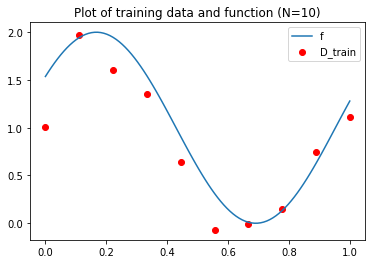

Figure: The function f is plotted from range 0 to 1, along with a scatterplot of the training data.


In [117]:
#Plot function and D_train (D10)

# Plot f function
x = np.linspace(0,1,100)
y = f(x)
plt.plot(x,y, label='f')
plt.title("Plot of training data and function (N=10)")

# Add D_train data as scatterplot
plt.scatter(D_train[0], D_train[1], c="red", label='D_train')

plt.legend()
plt.show()
print('Figure: The function f is plotted from range 0 to 1, along with a scatterplot of the training data.')


In [118]:
"""
Hidden test for variables N_train, X_train, t_train.
"""

'\nHidden test for variables N_train, X_train, t_train.\n'

### Exercise 1.2
Create a function `polynomial_curve_fit(D,M)` that takes as input a data set $\mathcal{D}_{N}$, consisting of $N$ input/output-pairs $\{x_n,t_n\}$, and a parameter $M$, representing the order of the polynomial in \eqref{yxw}, and outputs a vector of weights $\mathbf{w} = [w_0, \dots, w_M]$ that minimizes the sum-of-squares error function
\begin{equation*} E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \{ y(x_{n} ; \mathbf{w}) - t_{n} \} ^2 \tag{2} \end{equation*}
Hint: use the results from the Tutorial Exercises (Week 1, Exercise 5), and `np.linalg.solve` to solve a linear system of equations.

In [119]:
def polynomial_curve_fit(D, M):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    D : array
        Input dataset D.
    M : int
        The degree of the polynomial.
    
    Returns
    -------
    float
        Fitted weight vector w that minimizes the sum-of-squares function.
    '''
    x = D_train[0]
    y = D_train[1]

    range_M = np.array(range(M+1))
    range_N = np.array(range(len(x)))

    # Compute Ti
    Tni = np.zeros((len(x), M+1))
    for n in range_N:
        for i in range_M:
            Tni[n,i] = y[n]*x[n]**i
    Ti = sum(Tni)

    # Compute Aij
    Anij = np.zeros((len(x),M+1,M+1))
    for n in range_N:
        for i in range_M:
            for j in range_M:
                Anij[n,i,j] = x[n]**(i+j)
    Aij = sum(Anij)

    # Solve linear set of equations to calculate w
    w = np.linalg.solve(Aij, Ti)
    return w

polynomial_curve_fit(D_train, 2)

array([ 1.84279816, -4.15458561,  3.08208768])

In [120]:
"""
Hidden test for polynomial_curve_fit.
"""

'\nHidden test for polynomial_curve_fit.\n'

### Exercise 1.3
For the given dataset $\mathcal{D}_{10}$, run the `polynomial_curve_fit(D,M)` function for $M = [0, \dots, 9]$,  and, 
* Plot for various orders $M$ (at least for $M=0, M=1, M=3, M=9$) the resulting polynomial, together with the function $f$ and observations $\mathcal{D}_{10}$ (similar to Bishop, Fig 1.4)
* For each order $M \in [0, \dots, 9]$,  compute the root-mean-square error
\begin{equation*} E_{\text{RMS}} = \sqrt{2 E(\mathbf{w^*})/N} \tag{3} \end{equation*}
of the corresponding polynomial, evaluated on both the training set $\mathcal{D}_{10}$ and the testset $\mathcal{T}$.  Plot both as a function of $M$ in a single graph. (see Bishop, Fig.1.5).

First define the `polynomial` function to help you with calculating the predictions of outputs for the training and test data given w.

In [121]:
def polynomial(x, w):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    x : float
        Set of x-coordinates for which to evaluate the polynomial.
    w : float
        Input weight vector of size M+1 (for polynomial of degree M).
    
    Returns
    -------
    float
        Values of polynomial with weights w evaluated at x.
    '''
    y_hat = np.zeros(len(x))
    for i in range(len(w)):
        y_hat = y_hat + w[i]*x**i
    return y_hat

In [122]:
"""
Test for polynomial.
"""
assert np.array_equal(polynomial(np.array([1, 2]), np.array([1, 2, 3])),np.array([ 6., 17.]))

Now with the help of `polynomial` calculate the predictions. Then calculate the root-mean-square-error and 
create plots for various orders of $M$.

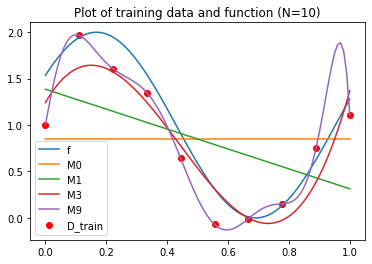

Figure: The function f and the fitted polynomials for different values of M are plotted on a range from 0 to 1, along with a scatterplot of the training data. The polynomials are fitted with 10 values and tested on 100 values.


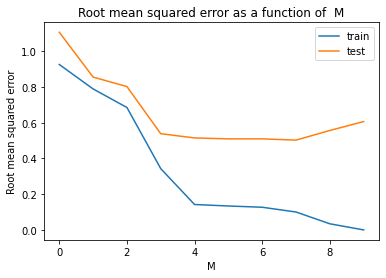

Figure: The root mean squared error is plotted as a function of M for the train data and the test data. The polynomials are fitted with 10 values and tested on 100 values.
[0.9253641340770221, 0.7886623031403126, 0.6849062314867042, 0.34274598483801616, 0.1421979981677912, 0.13391788429968968, 0.12690478396415797, 0.10024344839865675, 0.034343697118939365, 7.95780977952593e-05]
[1.1058282586387183, 0.8549594352865949, 0.8019509455430255, 0.5382269713255635, 0.5146244737353116, 0.5093961644477438, 0.5093504424879134, 0.5023753710843099, 0.5564199623847794, 0.6061097224991996]


In [123]:
# Plot f function
x = np.linspace(0,1,100)
y = f(x)
plt.plot(x,y, label='f')
plt.title("Plot of training data and function (N=10)")

# Add D_train data as scatterplot
plt.scatter(D_train[0], D_train[1], c="red", label='D_train')

# Initialize error
Erms_train = []
Erms_test = []

All_M = np.array(range(10))
for M in All_M:
    # Calculate weights
    w = polynomial_curve_fit(D_train[0],M)

    # Calculate predictions
    y_train = polynomial(D_train[0], w)
    y_test = polynomial(D_test[0], w)

    # Calculate errors
    Erms_train.append(np.sqrt(2*np.mean((y_train-D_train[1])**2)))
    Erms_test.append(np.sqrt(2*np.mean((y_test-D_test[1])**2)))

    # Plot for at least M = 0, 1, 3 en 9
    if M in [0,1,3,9]:
        y_M = polynomial(x, w)
        plt.plot(x,y_M, label='M'+str(M))

plt.legend()
plt.show()
print('Figure: The function f and the fitted polynomials for different values of M are plotted on a range from 0 to 1, along with a scatterplot of the training data. The polynomials are fitted with 10 values and tested on 100 values.')

plt.plot(All_M, Erms_train, label='train')
plt.plot(All_M, Erms_test, label='test')
plt.title('Root mean squared error as a function of  M')
plt.xlabel('M')
plt.ylabel('Root mean squared error')
plt.legend()
plt.show()
print('Figure: The root mean squared error is plotted as a function of M for the train data and the test data. The polynomials are fitted with 10 values and tested on 100 values.')
print(Erms_train)
print(Erms_test)

### Exercise 1.4
Repeat this procedure for a data set $\mathcal{D}_{40}$ of  40 observations (with the same noise level) and compare with the previous result.

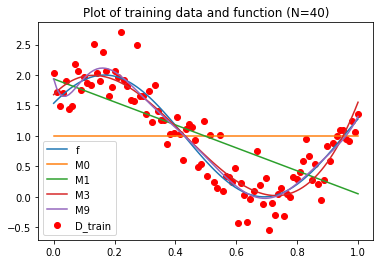

Figure: The function f and the fitted polynomials for different values of M are plotted on a range from 0 to 1, along with a scatterplot of the training data. The polynomials are fitted with 40 values and tested on 100 values.


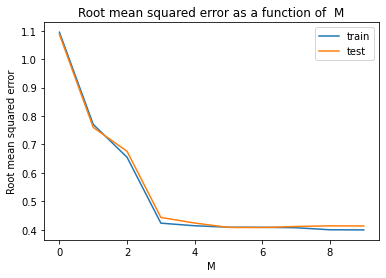

Figure: The root mean squared error is plotted as a function of M for the train data and the test data. The polynomials are fitted with 40 values and tested on 100 values.
[1.094612815674424, 0.7703544050299089, 0.6548223792867562, 0.4229834460731978, 0.41384817103112126, 0.4086655269930526, 0.408457406747606, 0.40685864272869887, 0.39973474165144307, 0.3992269572332459]
[1.0869243517721625, 0.7597818644373723, 0.6758157978368088, 0.4431025401501513, 0.4234006033826729, 0.40798227669148646, 0.4076418028014595, 0.411292276922961, 0.4135530314539056, 0.41316947464375636]


In [124]:
# Modified code from Exercise 1.1
#(N_train is set to 40 instead of 10)
N_train = 100
X_train = np.linspace(0,1,N_train) #uniform
t_train = f(X_train) + np.random.normal(0,0.3,N_train) #gaussian noise
D_train = np.vstack((X_train, t_train))

#Same code as Exercise 1.3

# Plot f function
x = np.linspace(0,1,100)
y = f(x)
plt.plot(x,y, label='f')
plt.title("Plot of training data and function (N=40)")

# Add D_train data as scatterplot
plt.scatter(D_train[0], D_train[1], c="red", label='D_train')

# Initialize error
Erms_train = []
Erms_test = []

All_M = np.array(range(10))
All_M = All_M
for M in All_M:
    # Calculate weights
    w = polynomial_curve_fit(D_train,M)

    # Calculate predictions
    y_train = polynomial(D_train[0], w)
    y_test = polynomial(D_test[0], w)

    # Calculate errors
    Erms_train.append(np.sqrt(2*np.mean((y_train-D_train[1])**2)))
    Erms_test.append(np.sqrt(2*np.mean((y_test-D_test[1])**2)))

    # Plot for at least M = 0, 1, 3 en 9
    if M in [0,1,3,9]:
        y_M = polynomial(x, w)
        plt.plot(x,y_M, label='M'+str(M))

plt.legend()
plt.show()
print('Figure: The function f and the fitted polynomials for different values of M are plotted on a range from 0 to 1, along with a scatterplot of the training data. The polynomials are fitted with 40 values and tested on 100 values.')

plt.plot(All_M, Erms_train, label='train')
plt.plot(All_M, Erms_test, label='test')
plt.title('Root mean squared error as a function of  M')
plt.xlabel('M')
plt.ylabel('Root mean squared error')
plt.legend()
plt.show()
print('Figure: The root mean squared error is plotted as a function of M for the train data and the test data. The polynomials are fitted with 40 values and tested on 100 values.')

print(Erms_train)
print(Erms_test)

The increase of training data points from 10 to 40 made it a lot harder for the model to overfit on the train data. This is visible by the smaller distance between the train and test rooted mean squared errors (definitely for the higher polynomials). Although if the input range of the test data would be increased outside of the range 0 to 1 the higher polynomial models still definitely overfit, as can be seen with M9 in both the models fitted on 10 and 40 data points. 

### Exercise 1.5
Modify the `polynomial_curve_fit(D,M)` function to include an additional penalty parameter $\lambda$, for a procedure that solves the minimization problem for a modified error function with quadratic regularizer (weight decay), given as
\begin{equation*}
\tilde{E} = E + \frac{\lambda}{2} \sum_{j=0}^M w_j^2. \label{regerr} \tag{4}
\end{equation*}
Verify that the regularizer drives the weights of high order terms in the polynomial to zero, and see if you can reproduce and explain the effect observed in Bishop, Fig.1.8. (note that the values here are computed for our data, so they are not identical to the ones in Bishop)

|$\ln\lambda=$|$-\infty$ |-18    |-9    |-4   |0    |
|-------------|----------|-------|------|-----|-----|
|$w_0^*$      |0.87      |0.89   |1.13  |1.59 |1.02 |
|$w_1^*$      |-166.39   |25.44  |8.97  |-0.20|-0.38|
|$w_2^*$      |4264.93   |-178.33|-29.89|-2.73|-0.41|
|$w_3^*$      |-39400.69 |530.85 |11.83 |-1.24|-0.25|
|$w_4^*$      |185746.67 |-751.83|15.07 |-0.05|-0.11|
|$w_5^*$      |-503783.21|171.74 |3.95  |0.56 |0.01 |
|$w_6^*$      |818011.41 |604.53 |-5.68 |0.79 |0.09 |
|$w_7^*$      |-785013.15|-111.73|-8.42 |0.83 |0.17 |
|$w_8^*$      |410395.73 |-692.14|-3.61 |0.78 |0.21 |
|$w_9^*$      |-90055.14 |401.63 |7.65  |0.69 |0.25 |

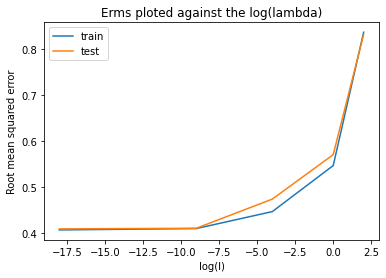


logl [-inf, -18, -9, -4, 0, 2]
Erms_train [0.3992269572332459, 0.40635350104933204, 0.40928338855822755, 0.44618360731285434, 0.546200189604923, 0.8358304478662166]
Erms_test [0.41316947464375636, 0.4085514029735539, 0.4099515571818005, 0.47331988792469426, 0.5698890467574366, 0.8312177369866983]



,logl=,-inf,-18,-9,-4,0,2
0,w0,1.937173,1.698070,1.634832,2.005735,1.919529,1.308510
1,w1,-19.599335,0.914386,5.269420,0.185057,-1.501749,-0.532602
2,w2,426.364817,39.948406,-19.070164,-5.942716,-1.226984,-0.485224
3,w3,-3362.838588,-313.707888,1.965615,-1.460171,-0.526985,-0.267396
4,w4,13394.550352,822.832331,11.106251,2.049435,0.000448,-0.086327
5,w5,-30827.176575,-980.740398,6.956756,3.226695,0.328589,0.041858
6,w6,42537.032783,269.980482,0.188062,2.756328,0.513369,0.128725
7,w7,-34589.640716,624.470211,-3.962340,1.373719,0.605411,0.186558
8,w8,15237.596768,-664.195755,-3.804633,-0.422258,0.639845,0.224518
9,w9,-2796.906049,200.060339,0.948230,-2.333313,0.639424,0.248929


In [125]:

def polynomial_curve_fit(D, M, lmb = 0):
    ''' This functions computes the value of a polynomial with weights w on data points x.
    
    Parameters
    ----------
    D : array
        Input dataset D.
    M : int
        The degree of the polynomial.
    lmb : float, optional
        Regularization parameter for polynomial curve fitting.
    
    Returns
    -------
    float
        Fitted weight vector w that minimizes the sum-of-squares function.
    '''
    x = D_train[0]
    y = D_train[1]

    range_M = np.array(range(M+1))
    range_N = np.array(range(len(x)))

    # Compute Ti
    Tni = np.zeros((len(x), M+1))
    for n in range_N:
        for i in range_M:
            Tni[n,i] = y[n]*x[n]**i
    Ti = sum(Tni)

    # Compute Aij
    Anij = np.zeros((len(x),M+1,M+1))
    for n in range_N:
        for i in range_M:
            for j in range_M:
                Anij[n,i,j] = x[n]**(i+j)
    Aij = sum(Anij)

    # Regularization of Aij
    for i in range_M:
        Aij[i,i] = Aij[i,i] + lmb

    # Solve linear set of equations to calculate w
    w = np.linalg.solve(Aij, Ti)
    return w

# Create table
M = 9
logl_values = [-float('inf'), -18, -9, -4, 0, 2]
df = pd.DataFrame({'logl=':  ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9',]}, columns=['logl='])
Erms_test = []
Erms_train = []

for logl in logl_values:
    l = np.e**logl
    w = polynomial_curve_fit(D_train,M, lmb = l)
    df[str(logl)] = w

    # Calculate predictions
    y_train = polynomial(D_train[0], w)
    y_test = polynomial(D_test[0], w)

    # Calculate errors
    Erms_train.append(np.sqrt(2*np.mean((y_train-D_train[1])**2)))
    Erms_test.append(np.sqrt(2*np.mean((y_test-D_test[1])**2)))

plt.plot(logl_values, Erms_train, label='train')
plt.plot(logl_values, Erms_test, label='test')
plt.title('Erms ploted against the log(lambda)')
plt.xlabel('log(l)')
plt.ylabel('Root mean squared error')
plt.legend() 
plt.show()

print()
print('logl', logl_values)
print('Erms_train',Erms_train)
print('Erms_test',Erms_test)
print()

df

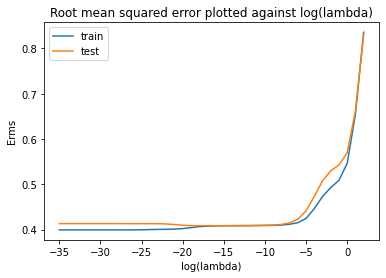

In [126]:
# Smoother plot than the one above
M = 9
logl_values = list(range(-35,3)) 
Erms_test = []
Erms_train = []

for logl in logl_values:
    l = np.e**logl
    w = polynomial_curve_fit(D_train,M, lmb = l)

    # Calculate predictions
    y_train = polynomial(D_train[0], w)
    y_test = polynomial(D_test[0], w)

    # Calculate errors
    Erms_train.append(np.sqrt(2*np.mean((y_train-D_train[1])**2)))
    Erms_test.append(np.sqrt(2*np.mean((y_test-D_test[1])**2)))
df

plt.plot(logl_values, Erms_train, label='train')
plt.plot(logl_values, Erms_test, label='test')
plt.title('Root mean squared error plotted against log(lambda)')
plt.xlabel('log(lambda)')
plt.ylabel('Erms')
plt.legend()
plt.show()

In [127]:
"""
Hidden test for polynomial_curve_fit.
"""

'\nHidden test for polynomial_curve_fit.\n'

A difference with our plot and Bisshops figure 1.8 is the start of the graph. In his graph the Erms_train starts as 0, with a fairly high Error on the test set. This isn't the case in our graph.
The model, even with all the freedom given to the weights can't tick off all the datapoints with polynomial 9. So the Erms, even with an log(lambda) of -infinity will not reach a train error of 0.
What is similar between figure 1.8 and our figure is the increase of both the train and test error when log(lambda) increases. When this happens the freedom weights of the model gets reduced to much and underfitting becomes an issue.

### Exercise 1.6
The polynomial curve fitting procedure can be extended to the case of multidimensional inputs. Assuming an input vector  of dimension $D$, namely $\mathbf{x} = (x_1, x_2, \dots, x_D)$, we can write the regression function $y$ as:
\begin{equation}
y(\mathbf{x}; \mathbf{w}) = \sum_{j = 0}^M \left( \sum_{n_1 + n_2 + ... + n_D = j} w_{n_1 n_2 ... n_D} x_1^{n_1} x_2^{n_2} ... x_D^{n_D} \right) \label{eqn:polynomial_multidimensional} \tag{5}
\end{equation}

In the last expression, $j$ refers to the order of the polynomial terms. The inner sum is over all the combinations of non-negative integers $n_1, n_2, \dots, n_D$, such that the constraint $n_1 + n_2 + \dots + n_D = j$ holds. The terms $n_1, n_2, \dots, n_D$ correspond to the exponent for each variable $x_1, x_2, \dots, x_D$ in their respective polynomial term.

Note that if $D = 1$, the above expression simplifies to the formula in equation \eqref{yxw}. The reason the second sum disappears is that there is only one combination of the non-negative integer $n_1$ for which the constraint $n_1 = j$ holds, which means that there is only  a single term to sum over.

Fitting the polynomial curve to a multidimensional input vector works analogously to the one-dimensional case. However, the number of parameters (the size of $\mathbf{w}$) becomes much larger, even when $D = 2$. Write down the general polynomial curve equation in \eqref{eqn:polynomial_multidimensional} for $D = 2$. How many parameters are needed in the two-dimensional case? Compare this to the number of parameters in the one-dimensional case.

For $D=2$:

$
(\mathbf{x}; \mathbf{w}) = \sum_{j = 0}^M \left( \sum_{n_1 + n_2 = j} w_{n_1, n_2} x_1^{n_1} x_2^{n_2} \right)
$

The number of parameters$ w$ for $D=2$ becomes $(M+1)*(M+2)/2$.
The number of parameters $w$ for $D=1$ was $M+1$.

## Exercise 2 (weight 25)
In this exercise, we consider the gradient descent algorithm for function minimization. When the function to be minimized is $E(\mathbf{x})$, the gradient descent iteration is  
\begin{equation*}
\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla E(\mathbf{x}_n) \tag{6}
\end{equation*}
where $\eta>0$ is the so-called learning-rate. In the following, we will apply gradient descent to the function
\begin{equation*}
h(x,y) = 100(y - x^2)^2 +(1 - x)^2 \label{banana} \tag{7}
\end{equation*}
### Exercise 2.1
Make a plot of the function $h$ over the interval $[-2 \leq x \leq 2] \times [-1 \leq y \leq 3]$. (Tip: Use the `plot_surface` function.) Can you guess from the plot if numerical minimization with gradient descent will be fast or slow for this function?

Looking at the plot below, we can see that due to the shape and color of contour lines in a valley, it will be slow to converge with numerical minimization with gradient descent.

In [128]:

"""
Create function h.
"""
def h(x,y):
    h  = 100*(y-x**2)**2 + (1-x)**2
    return h

"""
Declare x and y.
"""    
x = np.linspace(-2,2,500)
y = np.linspace(-1,3,500)

In [129]:
"""
Hiddent test for function h.
"""

'\nHiddent test for function h.\n'

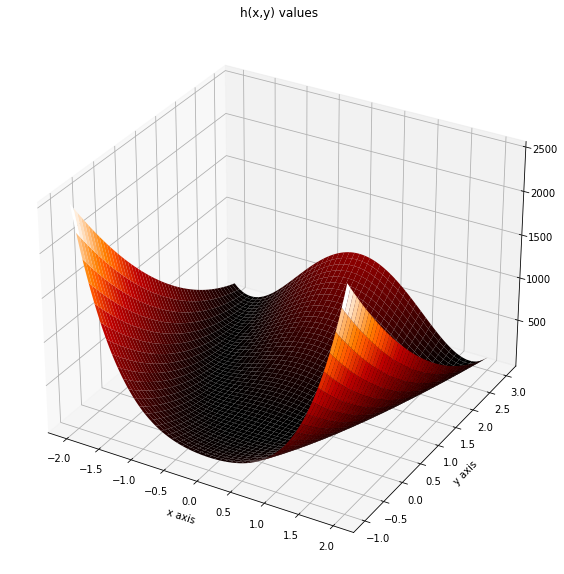

In [130]:
"""
Create a function to plot h.
"""
def plot_h(x,y):
    x, y = np.meshgrid(x, y)
    h_output = h(x,y)

    fig = plt.figure()
    fig.set_size_inches(*(14,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X=x, Y=y, Z=h_output, cmap = 'gist_heat')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    ax.set_title('h(x,y) values')
    
plot_h(x,y)

### Exercise 2.2
Knowing that a critical point of a function is a point where the gradient vanishes, show that $(1, 1)$ is the unique critical point of $h$.  Prove that this point is a minimum for $h$. 

$∇h(x, y) =  [2(200x^3 - 200xy + x-1), 200(y-x^2)]$
        $= [400x^3-400xy+2x-2, 200y-200x^2)]$
critical point of $h$, where $∇h(x,y) = 0$ 

Setting equal to zero yield equations for $x$ and $y$, solving the second to get: $y = x^2$. 
Substituting in the second gives: $400x^3-400xx^2+2x-2 = 400x^3-400x^3+2x-2 = 2x-2 = 0$ this gives $x^* = 1$ and $y^*=1$


### Exercise 2.3
_Write down the gradient descent iteration rule for this function._ 

Gradient descent iteration rule for finding $x$ in $h(x,y)$
starting with an inital value of $x$ and $\eta$ small, while the change in $x$ is large, compute
$x_{new} = x - \eta ∇h(x, y)$. 

The stop criterion is $∇h(x, y)$ around $0$, we will stop in local minimum of $h(x, y)$.

### Exercise 2.4
Implement gradient descent. Try some different values of $\eta$. Does the algorithm converge? How fast? Make plots of the trajectories on top of a contour plot of $h$. (Hint: have a look at the example contour_example.py on Brightspace for inspiration to plot contours of functions and trajectories). Report your findings. Explain why numerical minimization with gradient descent is slow for this function.

First implement the derivative of $h(x,y)$.

In [131]:
def dh_dxy(x, y):
    """
    This function is the derivative of the function h(x, y).
    
    Parameters
    ----------
    x : float
        data point from x-axis
    y : float
        data point from y-axis
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    """
    x_grad = 2*(200*x**3 - 200*x*y + x-1)
    y_grad = 200*(y-x**2)
    return (x_grad, y_grad)

In [132]:
"""
Test for dh_dxy.
"""
assert np.array_equal(dh_dxy(1, 1), np.array([0, 0]))

Now implement the gradient descent algorithm.

In [133]:
def grad_descent(grad, val_init,  eta=0.01, tol=1e-10, max_iter=1000):
    """ This function implements the gradient descent algorithm.
    
    Parameters
    ----------
    grad : function
        Returns the derivative of the function with respect to the pair (x, y).
    val_init : tuple
        Initial values for parameters
    eta : float
        Gradient descent learning rate
    max_iter : int
        Maximum number of gradient descent iterations
    tol : float
        Tolerance for detecting convergence
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    dists : array
        NumPy array of distances from the current point to the previous point
    tot_iter : int
        Number of performed gradient descent iterations
    """
    x, y = val_init
    x_vals, y_vals = np.empty(0), np.empty(0)
    dists = [[None,None]] * max_iter
    for i in range(max_iter):
        x_vals = np.append(x_vals,x)
        y_vals = np.append(y_vals,y)
        previous_point = grad(x,y)
        x = x - np.dot(eta, grad(x, y)[0])
        y = y - np.dot(eta, grad(x, y)[1])
        dists[i][0] = abs(grad(x,y)[0]-previous_point[0])
        dists[i][1] = abs(grad(x,y)[1]-previous_point[1])
        if math.isinf(x) or math.isinf(y):
            print("Gradient exploded!")
        if math.isnan(x) or math.isnan(y):
            print("Early stop at ", i+1)
            return [(x_vals,y_vals), dists, i + 1]
        if np.linalg.norm(dists[i])<tol:#sum(dists[i]) < tol: #or np.linalg.norm(grad(x, y)[1]) < tol:
            print("Early stop at ", i+1)
            return [(x_vals,y_vals), dists, i + 1]
    return [(x_vals,y_vals), dists, max_iter]

In [134]:
"""
Plot of trajectories on top of contour plot of h
"""
def plot_trajectories_h(X,Y,x,y):
    X,Y = np.meshgrid(X,Y)
    Z = h(X, Y)
    plot = plt.contour(X, Y, Z, cmap = 'jet')

    plt.clabel(plot, inline = 1, fontsize = 20)
    plt.title('Contour plot of h(x,y)')

    plt.scatter(x, y, color = 'r', marker = '*') # draw points
    plt.plot(x, y) # add lines between points

    plt.show()

In [135]:
X = np.linspace(-2,2,500)
Y = np.linspace(-1,3,500)

val_init = (0,0)

#grad_descent(grad=dh_dxy, val_init=val_init, eta=0.0005, max_iter=1000, tol=1e-5)

In [136]:
"""
Hidden test for grad_descent.
"""

'\nHidden test for grad_descent.\n'

Early stop at  9240


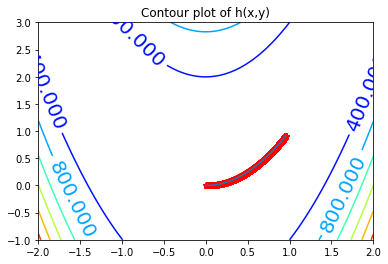

In [137]:
(x,y), dists, iters = grad_descent(grad=dh_dxy, val_init=val_init, eta=0.0005, max_iter=10000, tol=1e-5)
plot_trajectories_h(X,Y,x,y)

Finally, run the gradient descent algorithm with different values of $\eta$.

Early stop at  21649


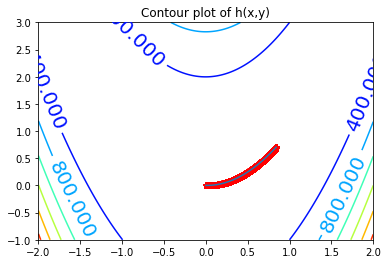

In [138]:
(x,y), dists, iters = grad_descent(grad=dh_dxy, val_init=val_init, eta=0.0001, max_iter=100000, tol=1e-5)
plot_trajectories_h(X,Y,x,y)

Early stop at  5709


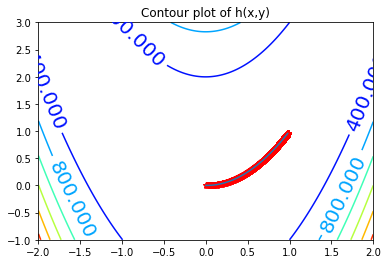

In [139]:
(x,y), dists, iters = grad_descent(grad=dh_dxy, val_init=val_init, eta=0.001, max_iter=10000, tol=1e-5)
plot_trajectories_h(X,Y,x,y)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
Gradient exploded!
Early stop at  33


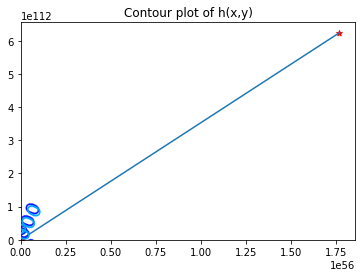

In [140]:
(x,y), dists, iters = grad_descent(grad=dh_dxy, val_init=val_init, eta=0.01, max_iter=10000, tol=1e-5)
plot_trajectories_h(X,Y,x,y)

_Explain what you see!_

The algorithm only is converging with high amount of iterations (the lower the learning rate the higher the iterations, then there is early stopping). The algorithm doesn't need that much time to converge
But numerical minimization with gradient descent can be slow for when having large data, there is every time an update for each iteration, large number of iterations is thus needed for large number of updates with the gradient.

The problem of vanishing gradients doesn't arrise because we got the stop function for convergence. When using a high learning rate, we got the problem of exploding gradients.
Gradient descent can be updated with a different function for taking the derivatives, where it bounds the gradients with a certain threshold, this avoids the problem.

In [141]:
def dh_dxy(x, y, lr):
    """
    This function is the derivative of the function h(x, y).
    
    Parameters
    ----------
    x : float
        data point from x-axis
    y : float
        data point from y-axis
    lr : learning rate 
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    """
    x_grad = 2*(200*x**3 - 200*x*y + x-1)
    y_grad = 200*(y-x**2)
    if (abs(x_grad))  > lr:
        x_grad = lr * x_grad/(abs(x_grad))
    if (abs(y_grad))  > lr:
        y_grad = lr * y_grad/(abs(y_grad))
    return (x_grad, y_grad)

## Exercise 3 (weight 25)
Suppose we have two healthy but curiously mixed boxes of fruit, with one box containing 8 apples and 4 grapefruit and the other containing 15 apples and 3 grapefruit. One of the boxes is selected at random and a piece of fruit is picked (but not eaten) from the chosen box, with equal probability for each item in the box. The piece of fruit is returned and then once again from the *same* box a second piece is chosen at random. This is known as sampling with replacement. Model the box by random variable $B$, the first piece of fruit by variable $F_1$, and the second piece by $F_2$.
### Exercise 3.1
What is the probability that the first piece of fruit is an apple given that the second piece of fruit was a grapefruit? How can the result of the second pick affect the probability of the first pick?

In box2 the amount of grapefruits is 3/18 while box1 has a 4/12 probability of picking a grapefruit. 
Thus having a higher chance of the box being box1. Box1 has a 8/12 propability to pick a apple. 
While box2 has 15/18 chance of picking an apple. But since you only know your second pick the probability of it being box1 is higher than being box2.

Please add the final result you got in the cell below! (Add it as a fraction, not an estimate. For example, write __1/3__, do not round to a number of decimals.)

In [142]:
"""
The variable p is probability of the first piece of fruit being
an apple given that the second piece of fruit was a grapefruit.
"""
from fractions import Fraction
B1 = {"apple":8/12,"grapefruit":4/12}
B2 = {"apple":15/18,"grapefruit":3/18}
Box = 0.5

P_FG =B1["grapefruit"]*Box +  B2["grapefruit"]*Box
P_FA =B1["apple"]*Box +  B2["apple"]*Box

#probabilty you pick box 1 based on F2 being grapefruit
P_FG_B1 = B1["grapefruit"]
P_B1_FG = (P_FG_B1 * Box)/P_FG
print("P(B=1|F=G)",P_B1_FG)
probability_B1 = P_B1_FG

# probability of picking an apple with the new box probabilities
P_FA_new = B1["apple"]*probability_B1 +  B2["apple"]*(1- probability_B1)
print("Probabilty of picking an apple first",Fraction(P_FA_new),"~=",str(P_FA_new))

P(B=1|F=G) 0.6666666666666666
Probabilty of picking an apple first 813149932719673/1125899906842624 ~= 0.7222222222222223


In [143]:
"""
Hidden check for value of variable p.
"""

'\nHidden check for value of variable p.\n'

### Exercise 3.2
Imagine now that after we remove a piece of fruit, it is not returned to the box. This is known as sampling without replacement. In this situation, recompute the probability that the first piece of fruit is an apple given that the second piece of fruit was a grapefruit. Explain the difference.

Since the first pick changes the compisition of fruit in the box the probabilities change for the second pick and thus you have to keep into an account that now a grapefruit or an apple could be missing. Thus adapting the odds of picking an grapefruit and changing the probability of the different boxes.

Please add the final result you got in the cell below! (Add it as a fraction, not an estimate. For example, write __1/3__, do not round to a number of decimals.)

In [144]:
"""
The variable p is probability of the first piece of fruit being
an apple given that the second piece of fruit was a grapefruit
when the sampling was done without replacement.
"""
B1 = {"apple":8,"grapefruit":4}
B2 = {"apple":15,"grapefruit":3}
Box = 0.5
pick1 = "apple"
pick2 = "grapefruit"

# remove apple when calculating second pick
B1[pick1] -= 1
B2[pick1] -= 1

P_FG =B1["grapefruit"]/sum(B1.values())*Box +  B2["grapefruit"]/sum(B2.values())*Box
P_FA =B1["apple"]/sum(B1.values())*Box +  B2["apple"]/sum(B2.values())*Box

#probabilty you pick box 1 based on F2 being grapefruit
P_FG_B1 = B1["grapefruit"]/sum(B1.values())
P_B1_FG = (P_FG_B1 * Box)/P_FG
#print("P(B=1|F=G)",P_B1_FG)
probability_B1_A = P_B1_FG

# add apple again since it is the first pick
B1[pick1] += 1
B2[pick1] += 1

# probability of picking an apple with the new box probabilities
P_FA_new_A = B1["apple"]/sum(B1.values())*probability_B1_A +  B2["apple"]/sum(B2.values())*(1- probability_B1)
#print("Probabilty of picking an apple if first was actually an apple",Fraction(P_FA_new),"~=",str(P_FA_new))

# remove grapefruit when calculating second pick
B1[pick2] -= 1
B2[pick2] -= 1

P_FG =B1["grapefruit"]/sum(B1.values())*Box +  B2["grapefruit"]/sum(B2.values())*Box
P_FA =B1["apple"]/sum(B1.values())*Box +  B2["apple"]/sum(B2.values())*Box

#probabilty you pick box 1 based on F2 being grapefruit
P_FG_B1 = B1["grapefruit"]/sum(B1.values())
P_B1_FG = (P_FG_B1 * Box)/P_FG
#print("P(B=1|F=G)",P_B1_FG)
probability_B1_G = P_B1_FG

# add grapefruit again since it is the first pick
B1[pick2] += 1
B2[pick2] += 1

# probability of picking an apple with the new box probabilities
P_FA_new_G = B1["apple"]/sum(B1.values())*probability_B1_G +  B2["apple"]/sum(B2.values())*(1- probability_B1)
#print("Probabilty of picking an apple if first was actually a grapefruit",Fraction(P_FA_new),"~=",str(P_FA_new))


######## TODO RIP
P = P_FA_new_A*probability_B1_A + P_FA_new_A*(1-probability_B1_A) *  P_FA_new_G*probability_B1_G + P_FA_new_G*(1-probability_B1_G)
print("Probabilty of picking an apple first",Fraction(P),"~=",str(P))

Probabilty of picking an apple first 941942850410593/1125899906842624 ~= 0.836613312325512


In [145]:
"""
Hidden check for value of variable p.
"""

'\nHidden check for value of variable p.\n'

### Exercise 3.3
Starting from the initial situation (i.e., sampling with replacement), we add a dozen oranges to the first box and repeat the experiment. Show that now the outcome of the first pick has no impact on the probability that the second pick is a grapefruit. Are the two picks now dependent or independent? Explain your answer.

In [146]:
"""
The variable p is probability of the first piece of fruit being
an apple given that the second piece of fruit was a grapefruit.
"""
from fractions import Fraction
B1 = {"apple":8/24,"grapefruit":4/24, "orange":12/24}
B2 = {"apple":15/18,"grapefruit":3/18, "orange":0/18}
Box = 0.5

P_FG =B1["grapefruit"]*Box +  B2["grapefruit"]*Box
P_FA =B1["apple"]*Box +  B2["apple"]*Box
P_FO =B1["orange"]*Box +  B2["orange"]*Box

#probabilty you pick box 1 based on F2 being grapefruit
P_FG_B1 = B1["grapefruit"]
P_B1_FG = (P_FG_B1 * Box)/P_FG
print("P(B=1|F=G)",P_B1_FG)
probability_B1 = P_B1_FG

# probability of picking an apple with the new box probabilities
P_FA_new = B1["apple"]*probability_B1 +  B2["apple"]*(1- probability_B1)
print(str(P_FA),"=",str(P_FA_new))

P(B=1|F=G) 0.5
0.5833333333333334 = 0.5833333333333334


Since the probability stays the same the picks are now independent.

## Exercise 4 - Bonus (weight 10)
Given a joint probability density function over the random vector $\mathbf{X} = (X_1, X_2, X_3, X_4)$ that factorizes as
$$p(x_1, x_2, x_3, x_4) = p(x_1, x_4 | x_2) p(x_2, x_3 | x_1),$$
show (using the sum and product rules for marginals and conditionals) that the following independence statements hold, in which the symbol $\bot$ stands for (conditional) independence:
1. $ X_1 \bot X_2;$
2. $ X_3 \bot X_4 \,|\, X_1, X_2.$

X $\bot$ Y | Z, X and Y are indep given Z


p(x1​,x4​∣x2​) = p(x2|x1​,x4​​)*p(x4​∣x2​)

p(x2​,x3​∣x1​) = p(x1|x2​,x3​​)*p(x3​∣x1​)

1. $ X_1 \bot X_2;$

Is False since x1 is dependend on x2 and x2 is dependend on x1.

2. $ X_3 \bot X_4 \,|\, X_1, X_2.$

Since $ X_3 \bot X_2 \,|\, X_1.$ and $ X_1 \bot X_4 \,|\, X_2.$ it implies  that $ X_3 \bot X_4 \,|\, X_1, X_2.$ is True.